In [16]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
%matplotlib inline

In [18]:
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

['pdf.ttf', 'tessconfigs', 'configs', 'ben.traineddata', 'eng.traineddata', 'osd.traineddata']


In [19]:
import shutil
src1 = 'ben.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src1, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

['pdf.ttf', 'tessconfigs', 'configs', 'ben.traineddata', 'eng.traineddata', 'osd.traineddata']


(600, 800, 3)


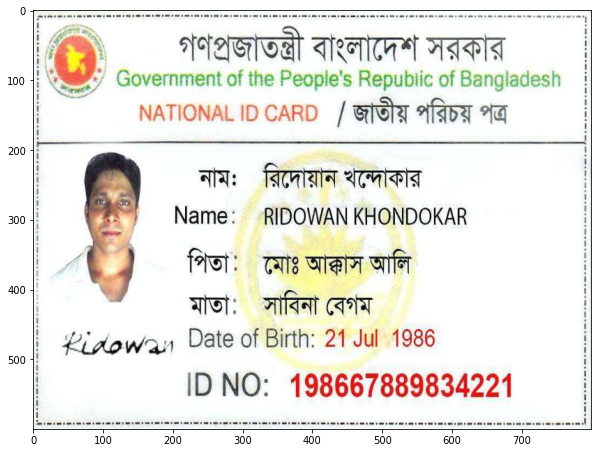

In [20]:
img2 = cv2.imread('demo.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)
# img2= cv2.resize(img2,None, fx=.5, fy=0.5) #resizing the image
img2= cv2.resize(img2,(800,600))
print(img2.shape)
fig= plt.figure(figsize= [10,10])
plt.imshow(img2)

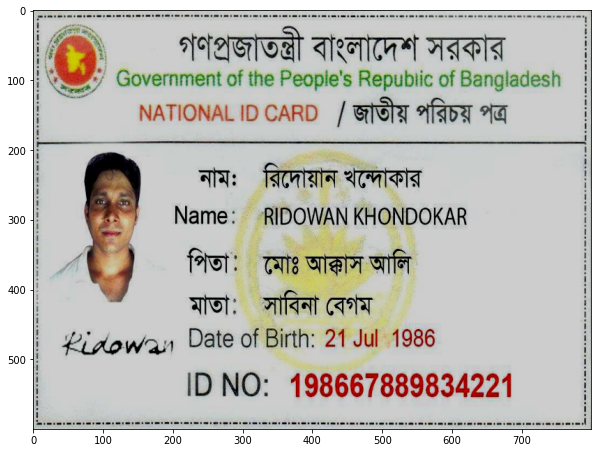

In [21]:
alpha = 1.0
beta = -50

new = alpha * img2 + beta
new = np.clip(new, 0, 255).astype(np.uint8)

cv2.imwrite("new.jpg", new)
fig= plt.figure(figsize= [10,10])
plt.imshow(new)

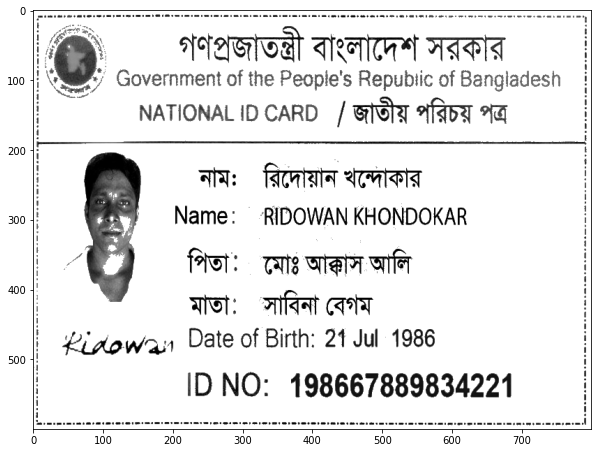

In [22]:
img2 = cv2.imread('new.jpg')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)   # converting image to grayscale
gray[gray > 150] = 255
fig = plt.figure(figsize= [10,10])
# plt.imshow(gray,cmap='gray', vmin=0, vmax=255) 
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)

True

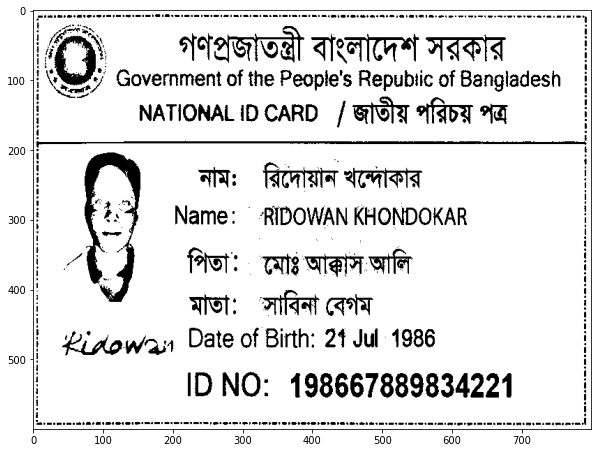

In [23]:
adaptive_threshold = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,85,50)
fig = plt.figure(figsize= [10,10])
plt.imshow(adaptive_threshold,cmap='gray', vmin=0, vmax=255)
cv2.imwrite("1.jpg", adaptive_threshold)

In [28]:
import cv2
image = cv2.imread("1.jpg")
# x,y= 190,220
# image = cv2.circle(image, (x,y), radius=5, color=(0, 0, 255), thickness=-1)
# x1,y1= 700,220
# image = cv2.circle(image, (x1,y1), radius=5, color=(0, 255,0), thickness=-1)
# x2,y2= 190,500
# image = cv2.circle(image, (x2,y2), radius=5, color=(0, 255,0), thickness=-1)

# x3,y3= 700,500
# image = cv2.circle(image, (x3,y3), radius=5, color=(0, 0, 255), thickness=-1)

# #x,y= 190,220
# x4,y4= 190,270
# image = cv2.circle(image, (x4,y4), radius=5, color=(0, 0, 255), thickness=-1)
# x5,y5= 700,270
# image = cv2.circle(image, (x5,y5), radius=5, color=(0, 255,0), thickness=-1)

# x6,y6= 190,330
# image = cv2.circle(image, (x6,y6), radius=5, color=(0, 0, 255), thickness=-1)
# x7,y7= 700,330
# image = cv2.circle(image, (x7,y7), radius=5, color=(0, 255,0), thickness=-1)

# x6,y6= 190,390
# image = cv2.circle(image, (x6,y6), radius=5, color=(0, 0, 255), thickness=-1)
# x7,y7= 700,390
# image = cv2.circle(image, (x7,y7), radius=5, color=(0, 255,0), thickness=-1)

# x6,y6= 190,440
# image = cv2.circle(image, (x6,y6), radius=5, color=(0, 0, 255), thickness=-1)
# x7,y7= 700,440
# image = cv2.circle(image, (x7,y7), radius=5, color=(0, 255,0), thickness=-1)

# x6,y6= 190,570
# image = cv2.circle(image, (x6,y6), radius=5, color=(0, 0, 255), thickness=-1)
# x7,y7= 700,570
# image = cv2.circle(image, (x7,y7), radius=5, color=(0, 255,0), thickness=-1)

# cv2.imshow("image", image)
# cv2.waitKey(0)
# if cv2.waitKey(1) & 0xFF == ord('q'):
#     cv2.destroyAllWindows()

x_left = 190
y_up = 220
x_val= 510
y_vals= [50,60,60,50,60,70]

crp = []
for i in range(len(y_vals)):
  if i==(len(y_vals)-2):
      x_left = 210
  cropped = image[y_up:y_up+y_vals[i], x_left:x_left+x_val]
  crp.append(cropped)
  y_up += y_vals[i]
  

for i in range(len(crp)):
    cv2.imwrite("cropped_"+str(i)+".jpg", crp[i])
    # cv2.imshow("cropped_"+str(i), crp[i])

# cv2.waitKey(0)
# if cv2.waitKey(1) & 0xFF == ord('q'):
#     cv2.destroyAllWindows()


# cv2.destroyAllWindows()

In [29]:
for i in crp:
  gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
  adaptive_threshold = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,85,50)
  text3 = pytesseract.image_to_string(adaptive_threshold,lang='ben')
  print(text3)

নাম: বরিদোয়ান খন্দোকার

Name:  ‘RIDOWAN KHONDOKAR

পিতা: . মোঃ আক্কাস আলি

মাতা: সাবিনা বেগম

Date of Birth: 24 Jul 1986

ID NO: 198667889834221



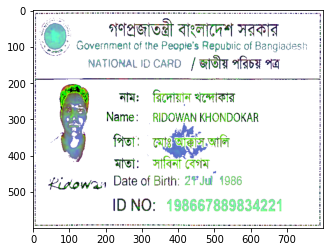

In [30]:
## tried to change hsv

img= cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)
img=np.copy(img)
light=np.where((img[:,:,1]<=100) & (img[:,:,2]>=130))
img[light]=(255,255,255)
plt.imshow(img)

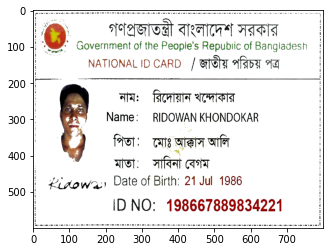

In [31]:
## tried to change rgb
img=np.copy(img2)
light=np.where((img[:,:,0]>=100) & (img[:,:,1]>=100) & (img[:,:,2]>=100))
# dark=np.where((img[:,:,0]<=150) & (img[:,:,1]<=150) & (img[:,:,2]<=150))

img[light]=(255,255,255)
plt.imshow(img)